In [26]:
#installing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
from tqdm import tqdm
import zipfile

In [27]:

# Downloading ZIP from Google Drive
file_id = "1Pd5y2I2wekrWRE6e2AGpvsrFtHWTWpdN"
url = f"https://drive.google.com/uc?id={file_id}"
output_zip = "transborder_data.zip"

gdown.download(url, output_zip, quiet=False)

# Extracting main ZIP
main_extract_dir = "transborder_data"
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(main_extract_dir)

# Extracting all monthly ZIPs inside data folder
monthly_zip_dir = os.path.join(main_extract_dir, "data")
monthly_extract_dir = "monthly_csvs"
os.makedirs(monthly_extract_dir, exist_ok=True)

for root, dirs, files in os.walk(monthly_zip_dir):
    for file in files:
        if file.endswith(".zip"):
            zip_path = os.path.join(root, file)
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                extract_to = os.path.join(monthly_extract_dir, file.replace(".zip", ""))
                os.makedirs(extract_to, exist_ok=True)
                zip_ref.extractall(extract_to)

# Combining all dot1 CSVs
dot1_files = []
for root, dirs, files in os.walk(monthly_extract_dir):
    for file in files:
        if file.startswith("dot1") and file.endswith(".csv"):
            dot1_files.append(os.path.join(root, file))

print(f" Found {len(dot1_files)} dot1 CSV files.")

# Reading and concatenating all dot1 CSVs
df_list = []
for path in tqdm(dot1_files, desc="Reading dot1 files"):
    try:
        df = pd.read_csv(path, encoding='latin1')
        df_list.append(df)
    except Exception as e:
        print(f" Error reading {path}: {e}")

df_all = pd.concat(df_list, ignore_index=True)
print(f" Combined shape: {df_all.shape}")

# Previewing available years
if 'YEAR' in df_all.columns:
    print(" Available years in combined data:", sorted(df_all['YEAR'].unique()))
else:
    print(" 'YEAR' column not found in data.")


Downloading...
From (original): https://drive.google.com/uc?id=1Pd5y2I2wekrWRE6e2AGpvsrFtHWTWpdN
From (redirected): https://drive.google.com/uc?id=1Pd5y2I2wekrWRE6e2AGpvsrFtHWTWpdN&confirm=t&uuid=fde6dce9-f7bd-4a20-b50f-dc996cb09536
To: /content/transborder_data.zip
100%|██████████| 386M/386M [00:06<00:00, 60.4MB/s]


 Found 99 dot1 CSV files.


Reading dot1 files:  43%|████▎     | 43/99 [00:04<00:06,  8.50it/s]/tmp/ipython-input-27-1229345591.py:40: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')
Reading dot1 files:  52%|█████▏    | 51/99 [00:05<00:08,  5.86it/s]/tmp/ipython-input-27-1229345591.py:40: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')
Reading dot1 files:  61%|██████    | 60/99 [00:06<00:03, 10.34it/s]/tmp/ipython-input-27-1229345591.py:40: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')
Reading dot1 files:  65%|██████▍   | 64/99 [00:06<00:03, 10.14it/s]/tmp/ipython-input-27-1229345591.py:40: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, enc

 Combined shape: (8332618, 14)
 Available years in combined data: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


# EDA

In [28]:
df_all.columns
df_all.head()


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0708,5,NaN,XO,1220,24865,0,74,2.0,X,1.0,2024
1,1,AK,0712,5,NaN,XM,1220,9990,0,1,1.0,X,1.0,2024
2,1,AK,0901,5,NaN,XO,1220,20374,0,392,1.0,X,1.0,2024
3,1,AK,2006,3,NaN,XC,1220,12373,39,236,1.0,X,1.0,2024
4,1,AK,20XX,3,NaN,XA,1220,40263,1822,408,1.0,X,1.0,2024


In [29]:
df_all.describe(include="all")

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
count,8.332618e+06,8332618,8332618,8.332618e+06,2411723,5290147,8.332618e+06,8.332618e+06,8.332618e+06,8.332618e+06,5.178963e+06,8332618,8.211492e+06,8.332618e+06
unique,NaN,52,246,NaN,33,14,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,TX,2304,NaN,XX,XO,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
freq,NaN,494298,901993,NaN,285648,1428632,NaN,NaN,NaN,NaN,NaN,4525634,NaN,NaN
mean,1.378471e+00,NaN,NaN,4.837705e+00,NaN,NaN,1.508451e+03,4.467223e+06,1.872532e+06,5.977482e+04,1.329437e+00,NaN,4.620422e+00,2.021565e+03
std,4.850059e-01,NaN,NaN,1.415442e+00,NaN,NaN,3.803582e+02,6.315438e+07,6.489453e+07,1.588473e+06,4.700088e-01,NaN,2.896211e+00,1.046434e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,2.020000e+03
25%,1.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,1.220000e+03,1.968800e+04,0.000000e+00,0.000000e+00,1.000000e+00,NaN,2.000000e+00,2.021000e+03
50%,1.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,1.220000e+03,1.029310e+05,4.000000e+00,3.770000e+02,1.000000e+00,NaN,4.000000e+00,2.022000e+03
75%,2.000000e+00,NaN,NaN,5.000000e+00,NaN,NaN,2.010000e+03,6.661360e+05,1.061200e+04,3.789000e+03,2.000000e+00,NaN,7.000000e+00,2.022000e+03


In [30]:
df_all.isnull().sum()

,0
TRDTYPE,0
USASTATE,0
DEPE,0
DISAGMOT,0
MEXSTATE,5920895
CANPROV,3042471
COUNTRY,0
VALUE,0
SHIPWT,0
FREIGHT_CHARGES,0


In [31]:
df_all[df_all['MONTH'].isna()][['YEAR', 'COUNTRY', 'TRDTYPE']].sample(10)


,YEAR,COUNTRY,TRDTYPE
7126609,2021,1220,2
3145918,2022,1220,1
7090550,2021,1220,1
7083428,2021,1220,1
7075079,2021,2010,1
3153905,2022,1220,1
3150802,2022,2010,1
7124775,2021,1220,2
3134834,2022,1220,1
3168905,2022,1220,1


In [32]:
month_order = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
    6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}


In [33]:
df_all = df_all[df_all['MONTH'].notna()]
df_all['MONTH'] = df_all['MONTH'].astype(int)
df_all['Month_Name'] = df_all['MONTH'].map(month_order)



/tmp/ipython-input-33-2667563339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['MONTH'] = df_all['MONTH'].astype(int)


In [34]:
df_all.duplicated().sum()


np.int64(6674954)

In [35]:
df_all[df_all.duplicated()].head()


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,Month_Name
54229,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1,2020,Jan
54230,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1,2020,Jan
54231,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1,2020,Jan
54232,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1,2020,Jan
54233,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1,2020,Jan


In [36]:
# --- Mapping Dictionaries ---
month_order = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
    6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

transtype = {
    1: 'Import',
    2: 'Export'
}

ModeofTransport = {
    1: 'Vessel',
    3: 'Air',
    4: 'Mail (U.S. Postal Service)',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zones (FTZs)'
}

country_map = {
    1220: "Canada",
    2010: "Mexico"
}

# --- Applying Mapping to New Columns ---
df['Mode_Label'] = df['DISAGMOT'].map(ModeofTransport)
df['Trade_Type'] = df['TRDTYPE'].map(transtype)
df['Month_Name'] = df['MONTH'].map(month_order)
df['Country_Name'] = df['COUNTRY'].map(country_map)

df_all['Mode_Label'] = df_all['DISAGMOT'].map(ModeofTransport)
df_all['Trade_Type'] = df_all['TRDTYPE'].map(transtype)
df_all['Month_Name'] = df_all['MONTH'].map(month_order)
df_all['Country_Name'] = df_all['COUNTRY'].map(country_map)


# Business Questions and Insights



### 1.   How has trade patterns evolved over the years (2020–2024)?





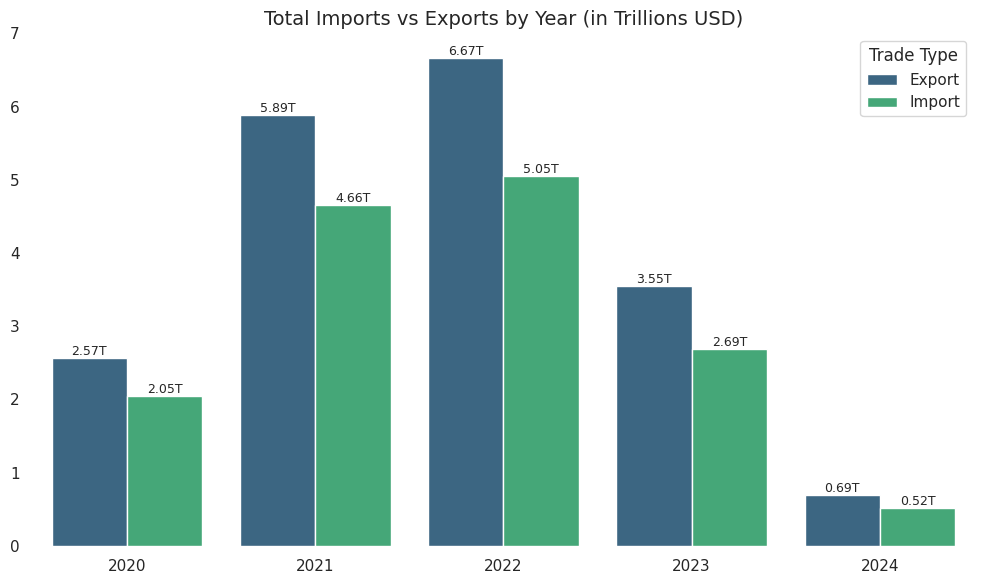

In [37]:

summary_df = df_all.groupby(['YEAR', 'Trade_Type'])['VALUE'].sum().reset_index()


sns.set(style="white")
palette = sns.color_palette("viridis", n_colors=2)


summary_df['VALUE_T'] = summary_df['VALUE'] / 1e12


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary_df, x='YEAR', y='VALUE_T', hue='Trade_Type', palette=palette)


for container in ax.containers:
    labels = [f'{val:.2f}T' for val in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9)

ax.set_title("Total Imports vs Exports by Year (in Trillions USD)", fontsize=14)
ax.set_xlabel("")  # No x-axis title
ax.set_ylabel("")  # No y-axis title
plt.xticks(rotation=0)
plt.legend(title="Trade Type")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



### Insight



From 2020 to 2024, U.S. exports consistently exceeded imports, indicating a sustained trade surplus with Canada and Mexico. Trade peaked in 2022 6.67T dollars exports, 505T dollars imports, likely due to post-COVID recovery. Activity declined sharply afterward, with 2024 recording the lowest volumes
0.69T dollars exports, 0.52T dollars imports, possibly due to economic or geopolitical factors. 2023 marked the start of this decline. Overall, the U.S. maintained strong export performance, reflecting a robust transborder trade position.






### 2.   What are the total trade values by mode of transportation?




/tmp/ipython-input-38-170110026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


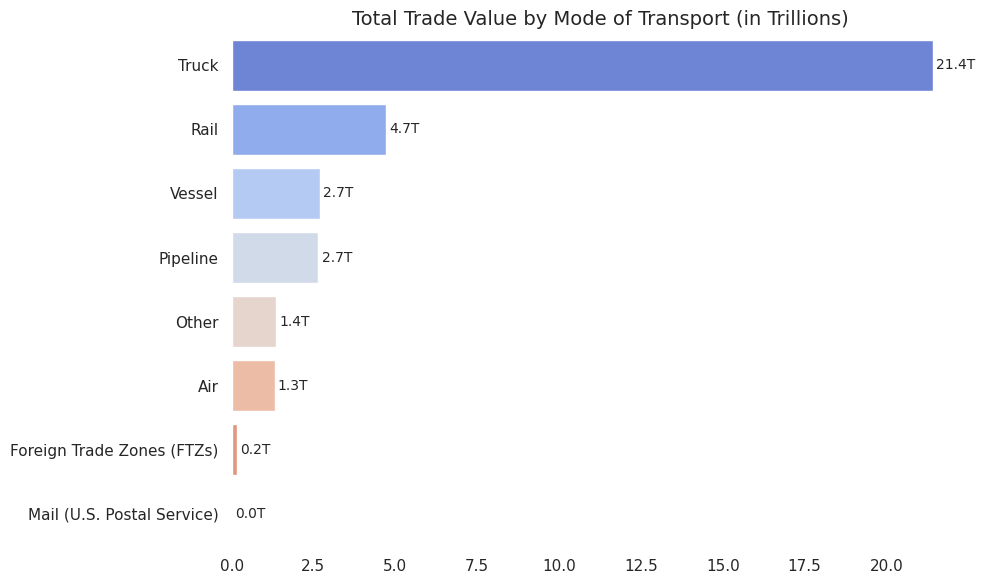

In [38]:


mode_value = df_all.groupby('Mode_Label')['VALUE'].sum().sort_values(ascending=False)
mode_value_tril = mode_value / 1e12

plt.figure(figsize=(10, 6))
sns.set_style("white")

barplot = sns.barplot(
    x=mode_value_tril.values,
    y=mode_value_tril.index,
    palette="coolwarm"
)

for i, value in enumerate(mode_value_tril.values):
    plt.text(value + 0.1, i, f'{value:.1f}T', va='center', fontsize=10)

plt.title("Total Trade Value by Mode of Transport (in Trillions)", fontsize=14)
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




### Insight

Truck transport dominates transborder trade, accounting for over 21.4 trillion dollars in total trade value from 2020 to 2024 far surpassing all other modes. Rail, Vessel, and Pipeline follow as key contributors, each handling between 2.6 and 4.7 trillion dollars. Meanwhile, Air and Other modes contribute moderately, while Foreign Trade Zones and Mail represent a negligible share. This underscores the critical role of road infrastructure in North American freight logistics.



### 3. What is the total trade value by country?




/tmp/ipython-input-39-196694426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


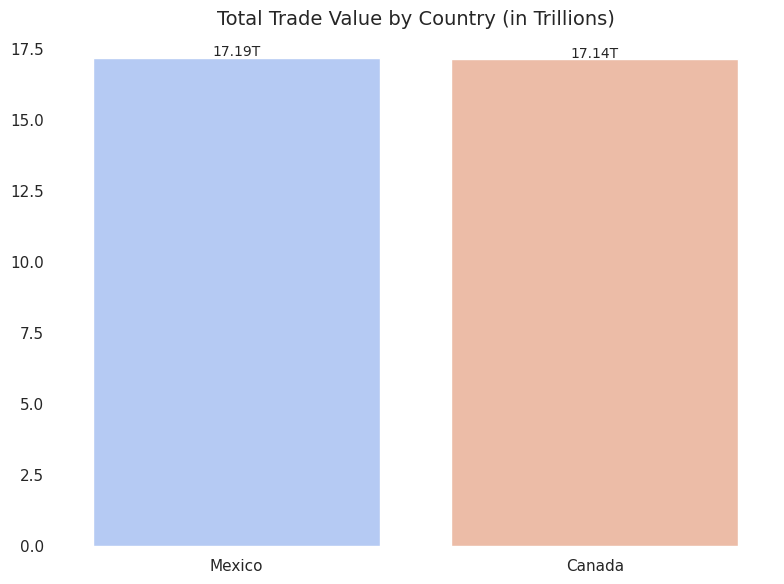

In [39]:


country_value = df_all.groupby('Country_Name')['VALUE'].sum().sort_values(ascending=False)
country_value_trillions = country_value / 1e12

plt.figure(figsize=(8, 6))
sns.set_style("white")


barplot = sns.barplot(
    x=country_value_trillions.index,
    y=country_value_trillions.values,
    palette="coolwarm"
)


for i, value in enumerate(country_value_trillions.values):
    plt.text(i, value + 0.05, f'{value:.2f}T', ha='center', fontsize=10)

plt.title("Total Trade Value by Country (in Trillions)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




### Insight


The U.S. recorded nearly equal trade with Mexico 17.19T dollars and Canada $17.14T dollars over the five-year period. Although the difference is minimal, Mexico slightly edged out Canada in total trade value over the five-year period. This balance reflects the deep economic integration the U.S. shares with both neighbors, likely driven by supply chain interdependencies and trade agreements such as USMCA.



### 4. Which mode of transport carries the most freight?





/tmp/ipython-input-40-2460090764.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


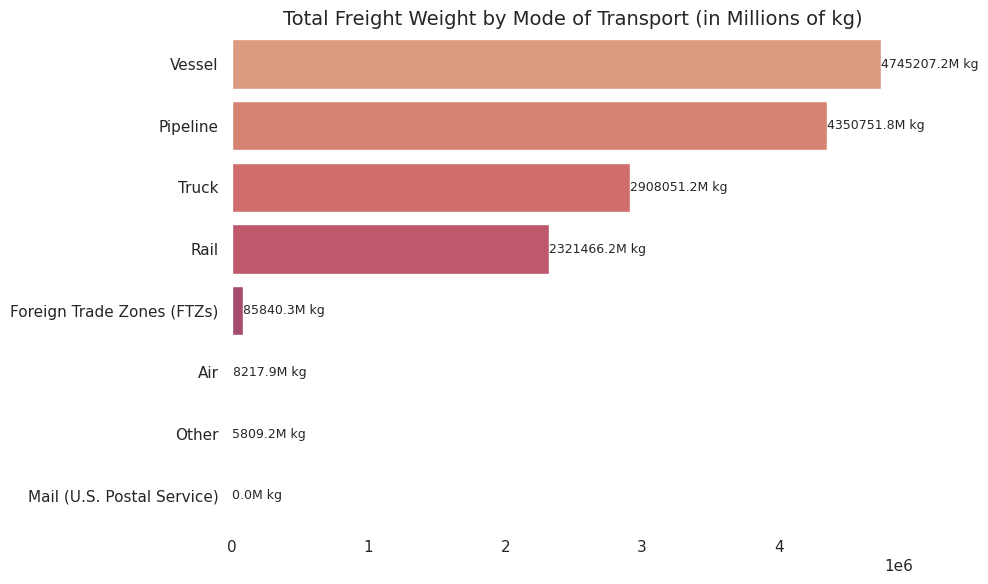

In [40]:

mode_freight = df_all.groupby('Mode_Label')['SHIPWT'].sum().sort_values(ascending=False)

mode_freight_million_kg = mode_freight / 1e6

plt.figure(figsize=(10, 6))
sns.set_style("white")

bar = sns.barplot(
    x=mode_freight_million_kg.values,
    y=mode_freight_million_kg.index,
    palette="flare"
)

for i, val in enumerate(mode_freight_million_kg.values):
    plt.text(val + 5, i, f'{val:.1f}M kg', va='center', fontsize=9)


plt.title("Total Freight Weight by Mode of Transport (in Millions of kg)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



### Insight

While trucks dominate in trade value, vessels transport the most freight by weight highlighting their role in moving bulk, low-value goods across borders. This contrast underscores how different modes serve different cargo types in U.S. transborder trade.












### 5.   What are the top 5 U.S. states with the highest trade value?




/tmp/ipython-input-41-1433172418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


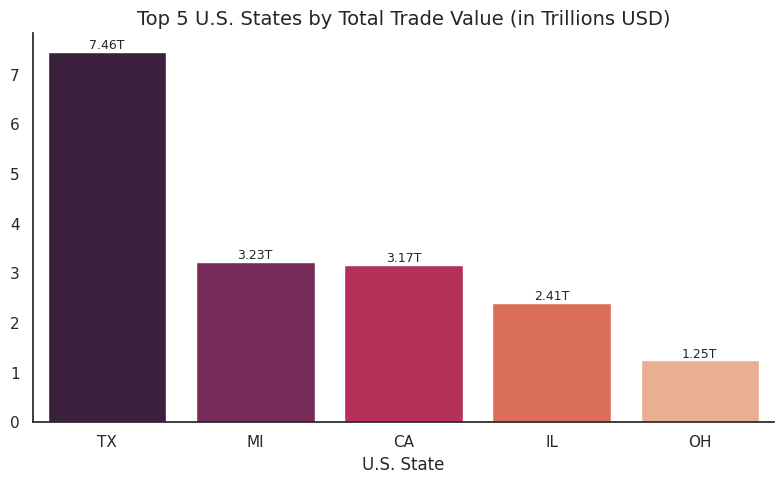

In [41]:


top_states = df_all.groupby('USASTATE')['VALUE'].sum().sort_values(ascending=False).head(5)
top_states_trillions = top_states / 1e12

plt.figure(figsize=(8, 5))
sns.set_style("white")
barplot = sns.barplot(
    x=top_states_trillions.index,
    y=top_states_trillions.values,
    palette="rocket"
)

for i, val in enumerate(top_states_trillions.values):
    plt.text(i, val + 0.05, f'{val:.2f}T', ha='center', fontsize=9)


plt.title("Top 5 U.S. States by Total Trade Value (in Trillions USD)", fontsize=14)
plt.xlabel("U.S. State")
plt.ylabel("")
sns.despine()
plt.tight_layout()
plt.show()



### Insight

Texas leads all U.S. states in total trade value with approximately 7.46 trillion dollars, significantly ahead of Michigan and California, each around 3.2 trillion dollars. This highlights Texas as a critical hub for international trade, likely driven by its extensive border with Mexico, major ports, and energy exports.

### 6. Top 3 months for trade activity across years




/tmp/ipython-input-42-3468813589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=top3_months, x='Month_Name', y='VALUE_TRILLION', palette="viridis")


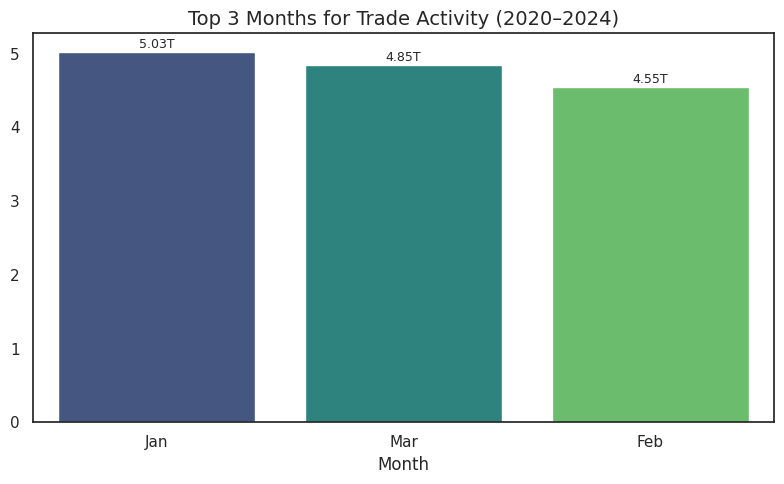

In [42]:

month_totals = df_all.groupby('Month_Name')['VALUE'].sum().reset_index()

month_totals['VALUE_TRILLION'] = month_totals['VALUE'] / 1e12


top3_months = month_totals.sort_values(by='VALUE_TRILLION', ascending=False).head(3)

plt.figure(figsize=(8, 5))
sns.set_style("white")

bar = sns.barplot(data=top3_months, x='Month_Name', y='VALUE_TRILLION', palette="viridis")

for i, val in enumerate(top3_months['VALUE_TRILLION']):
    plt.text(i, val + 0.05, f'{val:.2f}T', ha='center', fontsize=9)

plt.title("Top 3 Months for Trade Activity (2020–2024)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("")
plt.tight_layout()
plt.show()



### Insight

Between 2020 and 2024, January, March, and February recorded the highest trade activity, with January leading at $5.03 trillion. This trend may reflect strong post-holiday economic momentum and inventory restocking cycles early in the year.

### 7. Which U.S. states incur the highest freight costs relative to trade value, and where might logistics inefficiencies be impacting trade performance?






/tmp/ipython-input-43-2312741664.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=top_inefficient_states.index, y=top_inefficient_states.values, palette="crest")


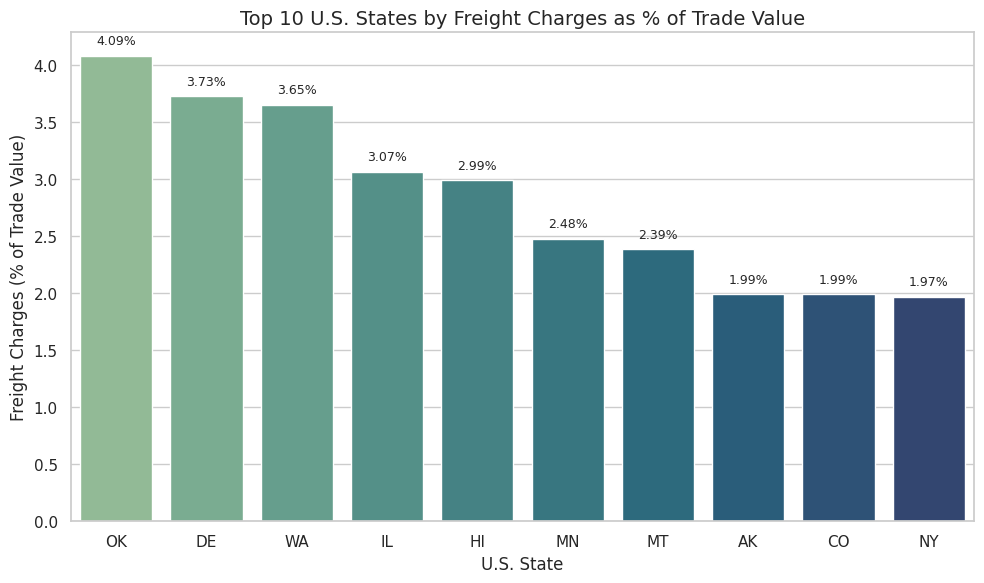

In [43]:

state_freight = df_all.groupby('USASTATE')[['FREIGHT_CHARGES', 'VALUE']].sum()


state_freight['Freight_%_of_Value'] = (state_freight['FREIGHT_CHARGES'] / state_freight['VALUE']) * 100


top_inefficient_states = state_freight['Freight_%_of_Value'].sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bar = sns.barplot(x=top_inefficient_states.index, y=top_inefficient_states.values, palette="crest")


for i, val in enumerate(top_inefficient_states.values):
    plt.text(i, val + 0.1, f'{val:.2f}%', ha='center', fontsize=9)

plt.title("Top 10 U.S. States by Freight Charges as % of Trade Value", fontsize=14)
plt.xlabel("U.S. State")
plt.ylabel("Freight Charges (% of Trade Value)")
plt.tight_layout()
plt.show()


### Insight

Oklahoma (OK), Delaware (DE), and Washington (WA) experience the highest freight charges relative to their trade value, each exceeding 3.5%. This suggests potential inefficiencies or higher logistics costs in these states. States like Alaska (AK), Colorado (CO), and New York (NY), while still in the top 10, show relatively lower freight cost burdens, under 2%. Addressing freight inefficiencies in the top-ranking states could significantly improve overall cost-effectiveness in trade operations

### 8. Which modes of transport are likely to contribute more to environmental impact, based on freight volume and usage?

/tmp/ipython-input-44-3506555548.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_emissions_millions.values, y=mode_emissions_millions.index, palette='magma')


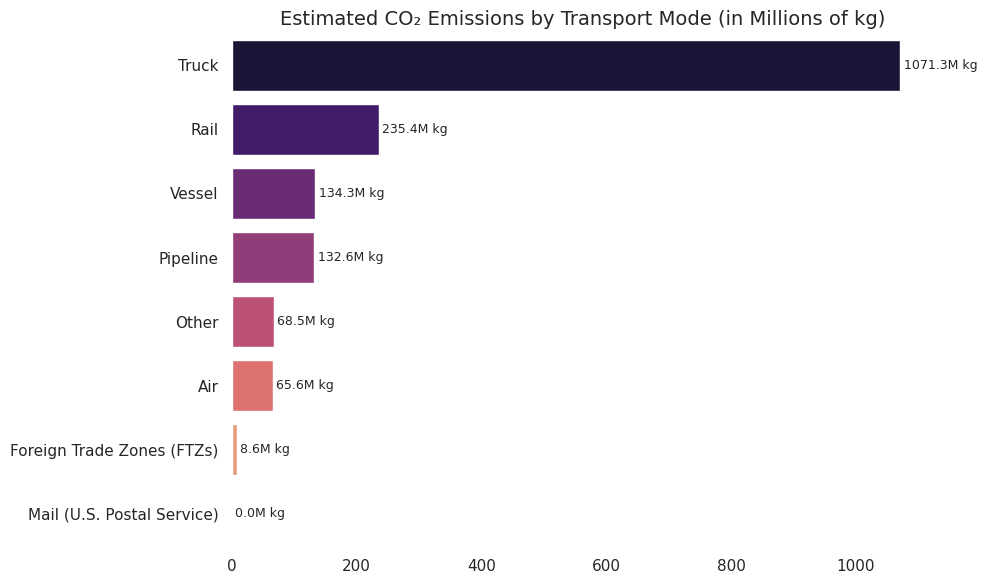

In [44]:



emission_factor = 0.00005
df_all['EST_CO2_EMISSIONS'] = df_all['VALUE'] * emission_factor


mode_emissions = df_all.groupby('Mode_Label')['EST_CO2_EMISSIONS'].sum().sort_values(ascending=False)
mode_emissions_millions = mode_emissions / 1e6

plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.barplot(x=mode_emissions_millions.values, y=mode_emissions_millions.index, palette='magma')

for spine in plt.gca().spines.values():
    spine.set_visible(False)


for i, val in enumerate(mode_emissions_millions.values):
    plt.text(val + 5, i, f'{val:.1f}M kg', va='center', fontsize=9)


plt.title("Estimated CO₂ Emissions by Transport Mode (in Millions of kg)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Insight

Truck transport accounts for the highest CO₂ emissions by a wide margin, contributing over 1,070M kg, followed by rail and vessel. Despite its speed, air contributes relatively little due to low trade volume. Modes like rail and vessel offer more efficient, lower-emission alternatives, especially for long-haul freight.



# Recommendations


### 1. Diversify Trade Partners and Mitigate Risks
Given the sharp decline in trade volumes post-2022, U.S. agencies should monitor economic and geopolitical factors impacting transborder trade. Exploring diversification beyond Canada and Mexico may reduce vulnerability to regional disruptions.

### 2. Strengthen Road Infrastructure and Border Efficiency
With trucks handling the majority of trade value, investment in road networks, customs processing, and border infrastructure is essential to maintain capacity, reduce delays, and support future growth.

### 3. Leverage Rail and Vessel for Cost-Effective, Sustainable Transport
Rail and vessels offer lower freight costs and emissions. Encouraging modal shifts from truck to rail or vessel where feasible can reduce logistics expenses and environmental impact, especially for bulk or long-haul goods.

### 4. Target High-Cost States for Logistics Optimization
States like Oklahoma, Delaware, and Washington exhibit disproportionately high freight costs. Focused interventions such as supply chain audits, infrastructure upgrades, or route optimizations could yield significant cost savings.

### 5. Monitor Seasonal Trade Trends for Strategic Planning
The consistent surge in trade during January to March suggests an opportunity to align resource planning, staffing, and inventory strategies to meet seasonal demand efficiently.

### 6. Enhance Trade Infrastructure in Key States
Texas, Michigan, and California play central roles in U.S. transborder trade. Ongoing investment in their trade-related infrastructure ports, rail terminals, highways will reinforce their strategic importance and national economic competitiveness.

### 7. Promote Greener Freight Alternatives
Trucks contribute the highest CO₂ emissions. Incentivizing greener technologies (e.g. electric trucks) and expanding rail/vessel networks can help meet environmental goals while sustaining trade performance.

